In [1]:
import pandas as pd
import protfasta
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing input script

In [2]:
interpro = pd.read_csv("../data/interpro_tf_doms_7-22-25.csv")
interpro_codes = interpro["Interpro domain code"].str.strip().drop_duplicates()
interpro_codes

0     IPR013087
2     IPR001356
3     IPR011598
4     IPR004827
5     IPR001766
6     IPR000536
7     IPR009071
8     IPR000418
9     IPR046360
10    IPR017956
11    IPR000327
12    IPR024752
13    IPR006612
14    IPR006600
15    IPR036388
16    IPR003656
17    IPR000679
18    IPR011539
19    IPR001132
20    IPR000770
21    IPR002857
22    IPR001346
23    IPR001739
24    IPR003150
25    IPR000232
26    IPR001275
27    IPR003350
28    IPR013801
29    IPR001606
30    IPR057520
31    IPR002100
32    IPR011129
33    IPR013854
34    IPR000818
35    IPR003690
36    IPR032200
37    IPR001523
38    IPR004212
39    IPR041686
40    IPR006578
41    IPR012295
42    IPR011615
43    IPR013524
44    IPR015351
45    IPR007889
46    IPR023082
47    IPR000967
48    IPR024061
49    IPR003902
50    IPR005559
51    IPR033467
52    IPR018586
53    IPR003958
54    IPR007588
Name: Interpro domain code, dtype: object

In [3]:
# Ran from scripts folder
print("python3 script-InterPro-parallelized.py " + " ".join(interpro_codes))

python3 script-InterPro-parallelized.py IPR013087 IPR001356 IPR011598 IPR004827 IPR001766 IPR000536 IPR009071 IPR000418 IPR046360 IPR017956 IPR000327 IPR024752 IPR006612 IPR006600 IPR036388 IPR003656 IPR000679 IPR011539 IPR001132 IPR000770 IPR002857 IPR001346 IPR001739 IPR003150 IPR000232 IPR001275 IPR003350 IPR013801 IPR001606 IPR057520 IPR002100 IPR011129 IPR013854 IPR000818 IPR003690 IPR032200 IPR001523 IPR004212 IPR041686 IPR006578 IPR012295 IPR011615 IPR013524 IPR015351 IPR007889 IPR023082 IPR000967 IPR024061 IPR003902 IPR005559 IPR033467 IPR018586 IPR003958 IPR007588


In [4]:
len(interpro_codes)

54

# How many input sequences?

In [5]:
all_dfs = []

for path in glob.glob("../output/interpro/*"):
    fasta_dict = protfasta.read_fasta(path, invalid_sequence_action = 'remove')
    path_df = pd.DataFrame({"path" : path, "id" : fasta_dict.keys(), "seq" : fasta_dict.values()})
    all_dfs.append(path_df)

all_dfs = pd.concat(all_dfs)
all_dfs["Interpro domain code"] = all_dfs["path"].str.split("/").str[-1].str.split(".").str[0]
all_dfs

,path,id,seq,Interpro domain code
0,../output/interpro/IPR007588.fasta,A0A5S9MMK5|IPR007588(70...135)|FLYWCH-type zin...,MMTTTVQKNCWRLDQTMLGLEKPGSSDISSSSTDTSAISPISVSSM...,IPR007588
1,../output/interpro/IPR007588.fasta,A8XJ98|IPR007588(54...120)|FLYWCH-type zinc fi...,MLGLEKPLSSDISSSSTDTSAISPISVSSMPLSPDKEKKKIKFIRY...,IPR007588
2,../output/interpro/IPR007588.fasta,Q18225|IPR007588(144...204)|FLYWCH transcripti...,MVDTMMNTNTDGVTAVPPIFPLPSTTPNRNNNNELAMLAQKQIVAG...,IPR007588
3,../output/interpro/IPR007588.fasta,Q4VC44|IPR007588(116...174;273...331;421...479...,MPLPEPSEQEGESVKAGQEPSPKPGTDVIPAAPRKPREFSKLVLLT...,IPR007588
4,../output/interpro/IPR007588.fasta,Q86B87|IPR007588(452...512)|Modifier of mdg4,MADDEQFSLCWNNFNTNLSAGFHESLCRGDLVDVSLAAEGQIVKAH...,IPR007588
...,...,...,...,...
43,../output/interpro/IPR001275.fasta,Q9QZ59|IPR001275(70...123)|Doublesex- and mab-...,MPNDDTFGKPSTPTEVPHAPGAPPQGKAGGYSKAAGAMAGAAGGSG...,IPR001275
44,../output/interpro/IPR001275.fasta,Q9TT01|IPR001275(67...120)|Doublesex- and mab-...,MPNDDAYSKPSAPSEAPHAPGPPPQGKAGGFSKALLGTSGGGGSGG...,IPR001275
45,../output/interpro/IPR001275.fasta,Q9XWN9|IPR001275(15...68;113...166)|Doublesex-...,MNIEEILPELFGEKRVYYCQRCLNHGLREKRKNHKLSCTFRFCQCS...,IPR001275
46,../output/interpro/IPR001275.fasta,Q9Y5R5|IPR001275(119...172)|Doublesex- and mab...,MADPQAGSAAGDWEIDVESLELEEDVCGAPRSTPPGPSPPPADGDC...,IPR001275


In [6]:
# Drop dups 
all_dfs = all_dfs.drop_duplicates(subset = "seq")
all_dfs

,path,id,seq,Interpro domain code
0,../output/interpro/IPR007588.fasta,A0A5S9MMK5|IPR007588(70...135)|FLYWCH-type zin...,MMTTTVQKNCWRLDQTMLGLEKPGSSDISSSSTDTSAISPISVSSM...,IPR007588
1,../output/interpro/IPR007588.fasta,A8XJ98|IPR007588(54...120)|FLYWCH-type zinc fi...,MLGLEKPLSSDISSSSTDTSAISPISVSSMPLSPDKEKKKIKFIRY...,IPR007588
2,../output/interpro/IPR007588.fasta,Q18225|IPR007588(144...204)|FLYWCH transcripti...,MVDTMMNTNTDGVTAVPPIFPLPSTTPNRNNNNELAMLAQKQIVAG...,IPR007588
3,../output/interpro/IPR007588.fasta,Q4VC44|IPR007588(116...174;273...331;421...479...,MPLPEPSEQEGESVKAGQEPSPKPGTDVIPAAPRKPREFSKLVLLT...,IPR007588
4,../output/interpro/IPR007588.fasta,Q86B87|IPR007588(452...512)|Modifier of mdg4,MADDEQFSLCWNNFNTNLSAGFHESLCRGDLVDVSLAAEGQIVKAH...,IPR007588
...,...,...,...,...
43,../output/interpro/IPR001275.fasta,Q9QZ59|IPR001275(70...123)|Doublesex- and mab-...,MPNDDTFGKPSTPTEVPHAPGAPPQGKAGGYSKAAGAMAGAAGGSG...,IPR001275
44,../output/interpro/IPR001275.fasta,Q9TT01|IPR001275(67...120)|Doublesex- and mab-...,MPNDDAYSKPSAPSEAPHAPGPPPQGKAGGFSKALLGTSGGGGSGG...,IPR001275
45,../output/interpro/IPR001275.fasta,Q9XWN9|IPR001275(15...68;113...166)|Doublesex-...,MNIEEILPELFGEKRVYYCQRCLNHGLREKRKNHKLSCTFRFCQCS...,IPR001275
46,../output/interpro/IPR001275.fasta,Q9Y5R5|IPR001275(119...172)|Doublesex- and mab...,MADPQAGSAAGDWEIDVESLELEEDVCGAPRSTPPGPSPPPADGDC...,IPR001275


In [7]:
# Keep rows with desired codes
seqs_with_codes = pd.merge(all_dfs, interpro, on = "Interpro domain code")
seqs_with_codes["name"] = seqs_with_codes["id"].str.split("|").str[2]
seqs_with_codes["Interpro domain name shortened"] = seqs_with_codes["Interpro domain name"].str.replace(" domain", "")
seqs_with_codes = seqs_with_codes.drop_duplicates(subset = "seq")
seqs_with_codes

,path,id,seq,Interpro domain code,DBD Family,Interpro domain name,Interpro superfamily name,Interpro superfamily domain code,name,Interpro domain name shortened
0,../output/interpro/IPR007588.fasta,A0A5S9MMK5|IPR007588(70...135)|FLYWCH-type zin...,MMTTTVQKNCWRLDQTMLGLEKPGSSDISSSSTDTSAISPISVSSM...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein peb-1,"Zinc finger, FLYWCH-type"
1,../output/interpro/IPR007588.fasta,A8XJ98|IPR007588(54...120)|FLYWCH-type zinc fi...,MLGLEKPLSSDISSSSTDTSAISPISVSSMPLSPDKEKKKIKFIRY...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein peb-1,"Zinc finger, FLYWCH-type"
2,../output/interpro/IPR007588.fasta,Q18225|IPR007588(144...204)|FLYWCH transcripti...,MVDTMMNTNTDGVTAVPPIFPLPSTTPNRNNNNELAMLAQKQIVAG...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH transcription factor 2,"Zinc finger, FLYWCH-type"
3,../output/interpro/IPR007588.fasta,Q4VC44|IPR007588(116...174;273...331;421...479...,MPLPEPSEQEGESVKAGQEPSPKPGTDVIPAAPRKPREFSKLVLLT...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein 1,"Zinc finger, FLYWCH-type"
4,../output/interpro/IPR007588.fasta,Q86B87|IPR007588(452...512)|Modifier of mdg4,MADDEQFSLCWNNFNTNLSAGFHESLCRGDLVDVSLAAEGQIVKAH...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,Modifier of mdg4,"Zinc finger, FLYWCH-type"
...,...,...,...,...,...,...,...,...,...,...
10693,../output/interpro/IPR001275.fasta,Q9QZ59|IPR001275(70...123)|Doublesex- and mab-...,MPNDDTFGKPSTPTEVPHAPGAPPQGKAGGYSKAAGAMAGAAGGSG...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding
10694,../output/interpro/IPR001275.fasta,Q9TT01|IPR001275(67...120)|Doublesex- and mab-...,MPNDDAYSKPSAPSEAPHAPGPPPQGKAGGFSKALLGTSGGGGSGG...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding
10695,../output/interpro/IPR001275.fasta,Q9XWN9|IPR001275(15...68;113...166)|Doublesex-...,MNIEEILPELFGEKRVYYCQRCLNHGLREKRKNHKLSCTFRFCQCS...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding
10696,../output/interpro/IPR001275.fasta,Q9Y5R5|IPR001275(119...172)|Doublesex- and mab...,MADPQAGSAAGDWEIDVESLELEEDVCGAPRSTPPGPSPPPADGDC...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding


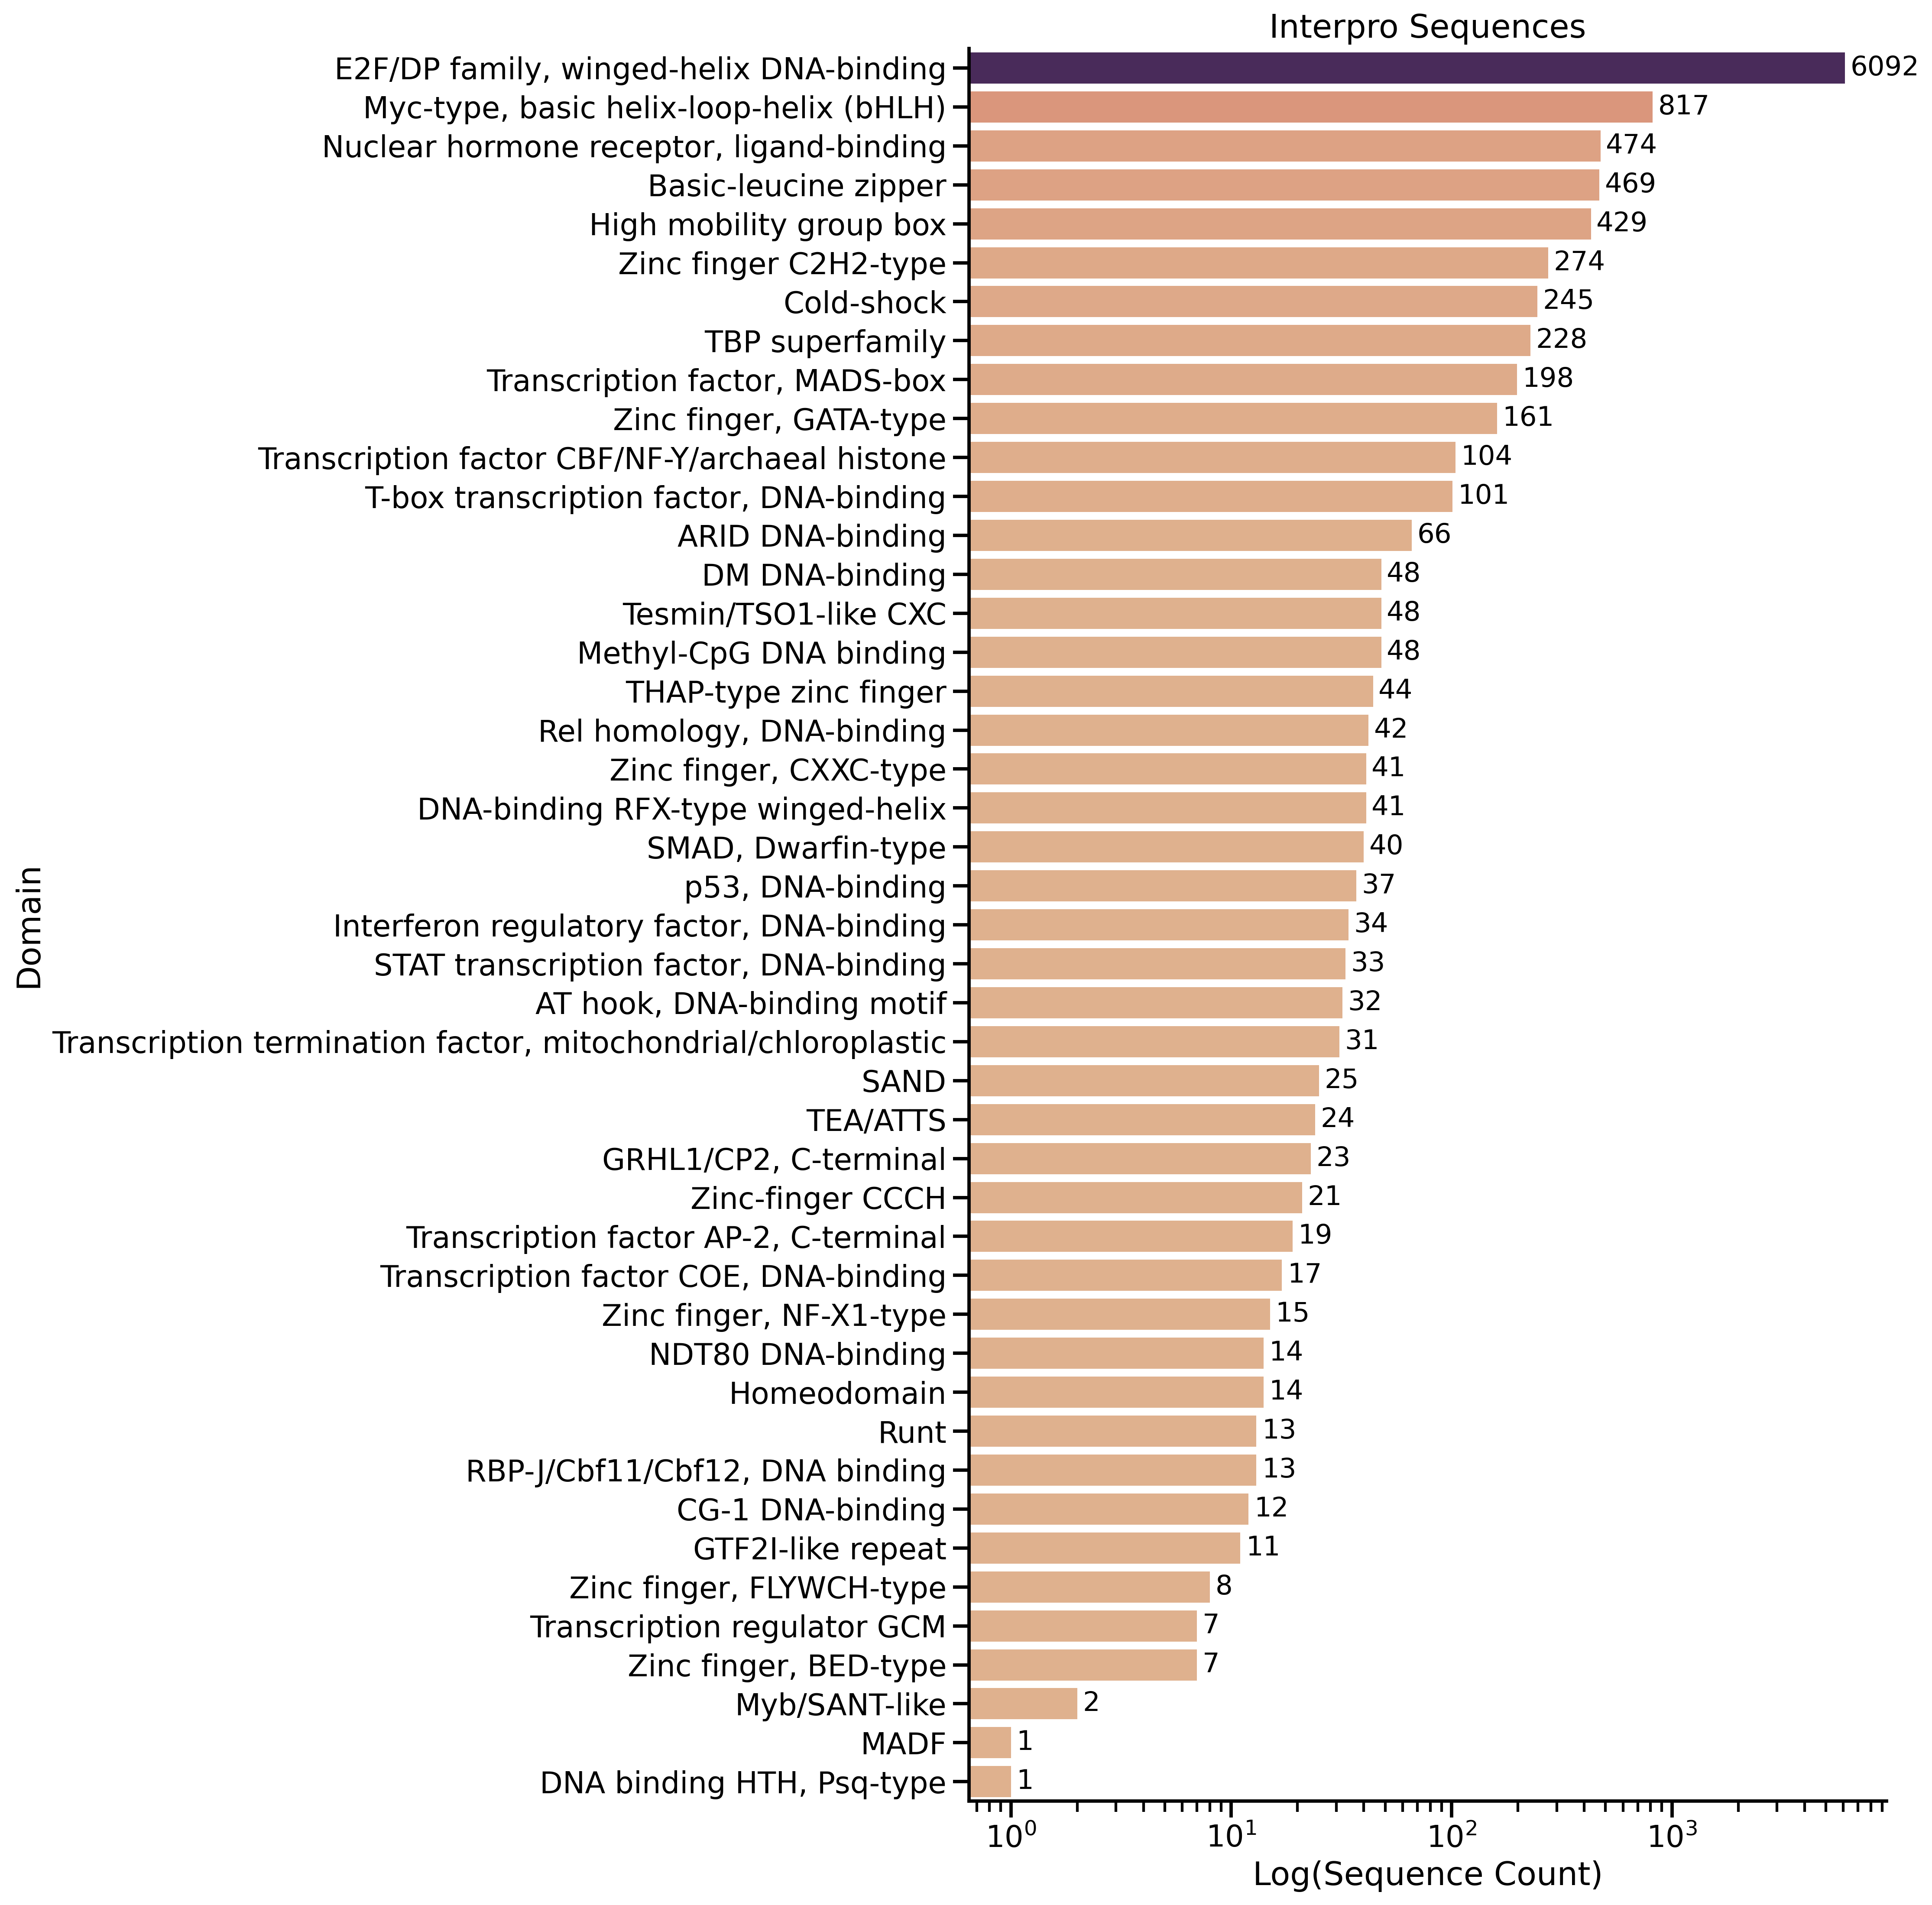

In [8]:
sns.set_context('talk')

counts = seqs_with_codes["Interpro domain name shortened"].value_counts()

plt.figure(figsize=(15, 15), dpi = 300)
ax = sns.barplot(
    y=counts.index,
    x=counts.values,
    hue=counts.values,
    palette='flare',
    legend=False
)

# Set log scale for x-axis
ax.set_xscale('log')

# Remove top and right spines
sns.despine()

# Add labels at the end of each bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v)}" for v in container.datavalues],
                 label_type='edge', fontsize='small', padding=3)

# Axis labels
plt.xlabel("Log(Sequence Count)")
plt.ylabel("")
plt.title("Interpro Sequences")
plt.ylabel("Domain")

plt.tight_layout()
plt.show()


# What species?

In [9]:
seqs_with_codes

,path,id,seq,Interpro domain code,DBD Family,Interpro domain name,Interpro superfamily name,Interpro superfamily domain code,name,Interpro domain name shortened
0,../output/interpro/IPR007588.fasta,A0A5S9MMK5|IPR007588(70...135)|FLYWCH-type zin...,MMTTTVQKNCWRLDQTMLGLEKPGSSDISSSSTDTSAISPISVSSM...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein peb-1,"Zinc finger, FLYWCH-type"
1,../output/interpro/IPR007588.fasta,A8XJ98|IPR007588(54...120)|FLYWCH-type zinc fi...,MLGLEKPLSSDISSSSTDTSAISPISVSSMPLSPDKEKKKIKFIRY...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein peb-1,"Zinc finger, FLYWCH-type"
2,../output/interpro/IPR007588.fasta,Q18225|IPR007588(144...204)|FLYWCH transcripti...,MVDTMMNTNTDGVTAVPPIFPLPSTTPNRNNNNELAMLAQKQIVAG...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH transcription factor 2,"Zinc finger, FLYWCH-type"
3,../output/interpro/IPR007588.fasta,Q4VC44|IPR007588(116...174;273...331;421...479...,MPLPEPSEQEGESVKAGQEPSPKPGTDVIPAAPRKPREFSKLVLLT...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein 1,"Zinc finger, FLYWCH-type"
4,../output/interpro/IPR007588.fasta,Q86B87|IPR007588(452...512)|Modifier of mdg4,MADDEQFSLCWNNFNTNLSAGFHESLCRGDLVDVSLAAEGQIVKAH...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,Modifier of mdg4,"Zinc finger, FLYWCH-type"
...,...,...,...,...,...,...,...,...,...,...
10693,../output/interpro/IPR001275.fasta,Q9QZ59|IPR001275(70...123)|Doublesex- and mab-...,MPNDDTFGKPSTPTEVPHAPGAPPQGKAGGYSKAAGAMAGAAGGSG...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding
10694,../output/interpro/IPR001275.fasta,Q9TT01|IPR001275(67...120)|Doublesex- and mab-...,MPNDDAYSKPSAPSEAPHAPGPPPQGKAGGFSKALLGTSGGGGSGG...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding
10695,../output/interpro/IPR001275.fasta,Q9XWN9|IPR001275(15...68;113...166)|Doublesex-...,MNIEEILPELFGEKRVYYCQRCLNHGLREKRKNHKLSCTFRFCQCS...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding
10696,../output/interpro/IPR001275.fasta,Q9Y5R5|IPR001275(119...172)|Doublesex- and mab...,MADPQAGSAAGDWEIDVESLELEEDVCGAPRSTPPGPSPPPADGDC...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding


In [10]:
seqs_with_codes["id"].iloc[0]

'A0A5S9MMK5|IPR007588(70...135)|FLYWCH-type zinc finger-containing protein peb-1'

# What species?

In [11]:
seqs_with_codes["uniprotID"] = seqs_with_codes["id"].str.split("|").str[0]
seqs_with_codes

,path,id,seq,Interpro domain code,DBD Family,Interpro domain name,Interpro superfamily name,Interpro superfamily domain code,name,Interpro domain name shortened,uniprotID
0,../output/interpro/IPR007588.fasta,A0A5S9MMK5|IPR007588(70...135)|FLYWCH-type zin...,MMTTTVQKNCWRLDQTMLGLEKPGSSDISSSSTDTSAISPISVSSM...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein peb-1,"Zinc finger, FLYWCH-type",A0A5S9MMK5
1,../output/interpro/IPR007588.fasta,A8XJ98|IPR007588(54...120)|FLYWCH-type zinc fi...,MLGLEKPLSSDISSSSTDTSAISPISVSSMPLSPDKEKKKIKFIRY...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein peb-1,"Zinc finger, FLYWCH-type",A8XJ98
2,../output/interpro/IPR007588.fasta,Q18225|IPR007588(144...204)|FLYWCH transcripti...,MVDTMMNTNTDGVTAVPPIFPLPSTTPNRNNNNELAMLAQKQIVAG...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH transcription factor 2,"Zinc finger, FLYWCH-type",Q18225
3,../output/interpro/IPR007588.fasta,Q4VC44|IPR007588(116...174;273...331;421...479...,MPLPEPSEQEGESVKAGQEPSPKPGTDVIPAAPRKPREFSKLVLLT...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein 1,"Zinc finger, FLYWCH-type",Q4VC44
4,../output/interpro/IPR007588.fasta,Q86B87|IPR007588(452...512)|Modifier of mdg4,MADDEQFSLCWNNFNTNLSAGFHESLCRGDLVDVSLAAEGQIVKAH...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,Modifier of mdg4,"Zinc finger, FLYWCH-type",Q86B87
...,...,...,...,...,...,...,...,...,...,...,...
10693,../output/interpro/IPR001275.fasta,Q9QZ59|IPR001275(70...123)|Doublesex- and mab-...,MPNDDTFGKPSTPTEVPHAPGAPPQGKAGGYSKAAGAMAGAAGGSG...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9QZ59
10694,../output/interpro/IPR001275.fasta,Q9TT01|IPR001275(67...120)|Doublesex- and mab-...,MPNDDAYSKPSAPSEAPHAPGPPPQGKAGGFSKALLGTSGGGGSGG...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9TT01
10695,../output/interpro/IPR001275.fasta,Q9XWN9|IPR001275(15...68;113...166)|Doublesex-...,MNIEEILPELFGEKRVYYCQRCLNHGLREKRKNHKLSCTFRFCQCS...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9XWN9
10696,../output/interpro/IPR001275.fasta,Q9Y5R5|IPR001275(119...172)|Doublesex- and mab...,MADPQAGSAAGDWEIDVESLELEEDVCGAPRSTPPGPSPPPADGDC...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9Y5R5


In [12]:
seqs_with_codes[["uniprotID"]].to_csv("../data/interpro_seq_uniprotids.csv", index = None, header = None)

In [13]:
interpro_species = pd.read_csv("../data/interpro_seq_species.txt", sep = "\t")
interpro_species = interpro_species.rename(columns = {"From" : "uniprotID"})
interpro_species = interpro_species.drop(columns = "Entry")
interpro_species

,uniprotID,Organism
0,A0A1L8FFY5,Xenopus laevis (African clawed frog)
1,A1L0Z1,Xenopus tropicalis (Western clawed frog) (Silu...
2,A7Y7W2,Gallus gallus (Chicken)
3,B3DM23,Xenopus tropicalis (Western clawed frog) (Silu...
4,B3DM25,Xenopus tropicalis (Western clawed frog) (Silu...
...,...,...
12779,Q9Y5Q3,Homo sapiens (Human)
12780,Q9Z125,Mus musculus (Mouse)
12781,Q9Z2Q8,Cricetulus griseus (Chinese hamster) (Cricetul...
12782,O82368,Arabidopsis thaliana (Mouse-ear cress)


In [14]:
seqs_with_codes_and_species = pd.merge(seqs_with_codes, interpro_species, on = 'uniprotID')
seqs_with_codes_and_species["common name"] = seqs_with_codes_and_species["Organism"].str.split("(").str[1].str.split(")").str[0]
seqs_with_codes_and_species

,path,id,seq,Interpro domain code,DBD Family,Interpro domain name,Interpro superfamily name,Interpro superfamily domain code,name,Interpro domain name shortened,uniprotID,Organism,common name
0,../output/interpro/IPR007588.fasta,A0A5S9MMK5|IPR007588(70...135)|FLYWCH-type zin...,MMTTTVQKNCWRLDQTMLGLEKPGSSDISSSSTDTSAISPISVSSM...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein peb-1,"Zinc finger, FLYWCH-type",A0A5S9MMK5,Caenorhabditis elegans,NaN
1,../output/interpro/IPR007588.fasta,A8XJ98|IPR007588(54...120)|FLYWCH-type zinc fi...,MLGLEKPLSSDISSSSTDTSAISPISVSSMPLSPDKEKKKIKFIRY...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein peb-1,"Zinc finger, FLYWCH-type",A8XJ98,Caenorhabditis briggsae,NaN
2,../output/interpro/IPR007588.fasta,Q18225|IPR007588(144...204)|FLYWCH transcripti...,MVDTMMNTNTDGVTAVPPIFPLPSTTPNRNNNNELAMLAQKQIVAG...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH transcription factor 2,"Zinc finger, FLYWCH-type",Q18225,Caenorhabditis elegans,NaN
3,../output/interpro/IPR007588.fasta,Q4VC44|IPR007588(116...174;273...331;421...479...,MPLPEPSEQEGESVKAGQEPSPKPGTDVIPAAPRKPREFSKLVLLT...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein 1,"Zinc finger, FLYWCH-type",Q4VC44,Homo sapiens (Human),Human
4,../output/interpro/IPR007588.fasta,Q86B87|IPR007588(452...512)|Modifier of mdg4,MADDEQFSLCWNNFNTNLSAGFHESLCRGDLVDVSLAAEGQIVKAH...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,Modifier of mdg4,"Zinc finger, FLYWCH-type",Q86B87,Drosophila melanogaster (Fruit fly),Fruit fly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10419,../output/interpro/IPR001275.fasta,Q9QZ59|IPR001275(70...123)|Doublesex- and mab-...,MPNDDTFGKPSTPTEVPHAPGAPPQGKAGGYSKAAGAMAGAAGGSG...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9QZ59,Mus musculus (Mouse),Mouse
10420,../output/interpro/IPR001275.fasta,Q9TT01|IPR001275(67...120)|Doublesex- and mab-...,MPNDDAYSKPSAPSEAPHAPGPPPQGKAGGFSKALLGTSGGGGSGG...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9TT01,Sus scrofa (Pig),Pig
10421,../output/interpro/IPR001275.fasta,Q9XWN9|IPR001275(15...68;113...166)|Doublesex-...,MNIEEILPELFGEKRVYYCQRCLNHGLREKRKNHKLSCTFRFCQCS...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9XWN9,Caenorhabditis elegans,NaN
10422,../output/interpro/IPR001275.fasta,Q9Y5R5|IPR001275(119...172)|Doublesex- and mab...,MADPQAGSAAGDWEIDVESLELEEDVCGAPRSTPPGPSPPPADGDC...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9Y5R5,Homo sapiens (Human),Human


In [15]:
seqs_with_codes_and_species["Organism"].value_counts()

Organism
Homo sapiens (Human)                                                               725
Mus musculus (Mouse)                                                               675
Arabidopsis thaliana (Mouse-ear cress)                                             583
Caenorhabditis elegans                                                             310
Rattus norvegicus (Rat)                                                            293
                                                                                  ... 
Fervidobacterium nodosum (strain ATCC 35602 / DSM 5306 / Rt17-B1)                    1
Campylobacter jejuni subsp. doylei (strain ATCC BAA-1458 / RM4099 / 269.97)          1
Campylobacter curvus (strain 525.92)                                                 1
Bdellovibrio bacteriovorus (strain ATCC 15356 / DSM 50701 / NCIMB 9529 / HD100)      1
Trachemys scripta (Red-eared slider turtle) (Pseudemys scripta)                      1
Name: count, Length: 1644, dtype: 

In [16]:
seqs_with_codes_and_species["Organism"].value_counts()[seqs_with_codes_and_species["Organism"].value_counts() >= 10]

Organism
Homo sapiens (Human)                                                                                 725
Mus musculus (Mouse)                                                                                 675
Arabidopsis thaliana (Mouse-ear cress)                                                               583
Caenorhabditis elegans                                                                               310
Rattus norvegicus (Rat)                                                                              293
                                                                                                    ... 
Alligator mississippiensis (American alligator)                                                       10
Bradyrhizobium diazoefficiens (strain JCM 10833 / BCRC 13528 / IAM 13628 / NBRC 14792 / USDA 110)     10
Clostridium tetani (strain Massachusetts / E88)                                                       10
Bacillus anthracis                            

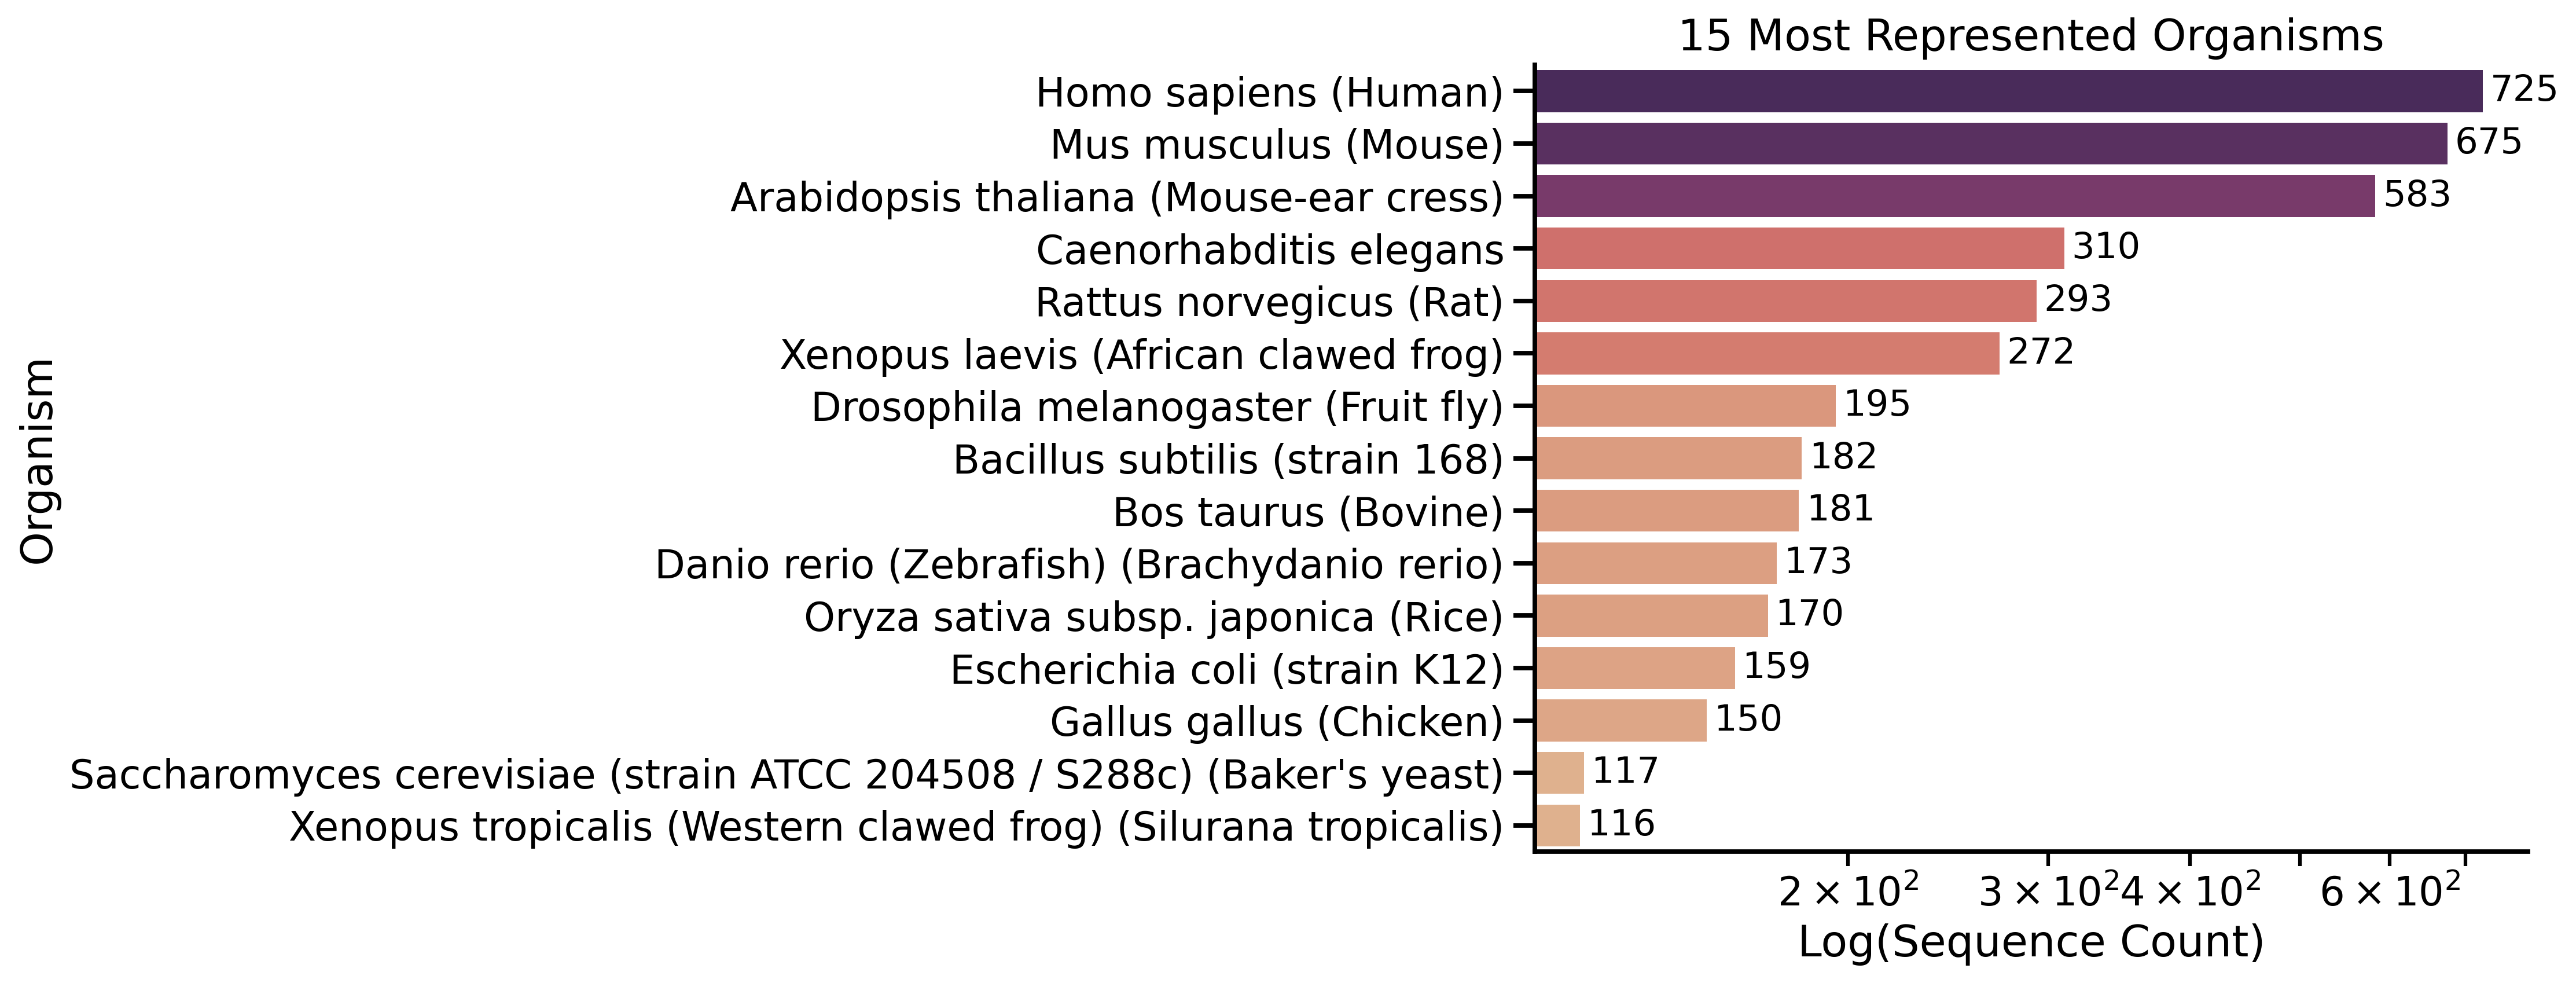

In [40]:
sns.set_context('talk')

counts = seqs_with_codes_and_species["Organism"].value_counts().head(15)

plt.figure(figsize=(15, 6), dpi = 300)
ax = sns.barplot(
    y=counts.index,
    x=counts.values,
    hue=counts.values,
    palette='flare',
    legend=False
)

# Set log scale for x-axis
ax.set_xscale('log')

# Remove top and right spines
sns.despine()

# Add labels at the end of each bar
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v)}" for v in container.datavalues],
                 label_type='edge', fontsize='small', padding=3)

# Axis labels
plt.xlabel("Log(Sequence Count)")
plt.ylabel("Organism")
plt.title("15 Most Represented Organisms")

plt.tight_layout()
plt.show()


# Are sequences diverse?

In [19]:
seqs_with_codes_and_species

,path,id,seq,Interpro domain code,DBD Family,Interpro domain name,Interpro superfamily name,Interpro superfamily domain code,name,Interpro domain name shortened,uniprotID,Organism,common name
0,../output/interpro/IPR007588.fasta,A0A5S9MMK5|IPR007588(70...135)|FLYWCH-type zin...,MMTTTVQKNCWRLDQTMLGLEKPGSSDISSSSTDTSAISPISVSSM...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein peb-1,"Zinc finger, FLYWCH-type",A0A5S9MMK5,Caenorhabditis elegans,NaN
1,../output/interpro/IPR007588.fasta,A8XJ98|IPR007588(54...120)|FLYWCH-type zinc fi...,MLGLEKPLSSDISSSSTDTSAISPISVSSMPLSPDKEKKKIKFIRY...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein peb-1,"Zinc finger, FLYWCH-type",A8XJ98,Caenorhabditis briggsae,NaN
2,../output/interpro/IPR007588.fasta,Q18225|IPR007588(144...204)|FLYWCH transcripti...,MVDTMMNTNTDGVTAVPPIFPLPSTTPNRNNNNELAMLAQKQIVAG...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH transcription factor 2,"Zinc finger, FLYWCH-type",Q18225,Caenorhabditis elegans,NaN
3,../output/interpro/IPR007588.fasta,Q4VC44|IPR007588(116...174;273...331;421...479...,MPLPEPSEQEGESVKAGQEPSPKPGTDVIPAAPRKPREFSKLVLLT...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,FLYWCH-type zinc finger-containing protein 1,"Zinc finger, FLYWCH-type",Q4VC44,Homo sapiens (Human),Human
4,../output/interpro/IPR007588.fasta,Q86B87|IPR007588(452...512)|Modifier of mdg4,MADDEQFSLCWNNFNTNLSAGFHESLCRGDLVDVSLAAEGQIVKAH...,IPR007588,FLYWCH,"Zinc finger, FLYWCH-type",NaN,NaN,Modifier of mdg4,"Zinc finger, FLYWCH-type",Q86B87,Drosophila melanogaster (Fruit fly),Fruit fly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10419,../output/interpro/IPR001275.fasta,Q9QZ59|IPR001275(70...123)|Doublesex- and mab-...,MPNDDTFGKPSTPTEVPHAPGAPPQGKAGGYSKAAGAMAGAAGGSG...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9QZ59,Mus musculus (Mouse),Mouse
10420,../output/interpro/IPR001275.fasta,Q9TT01|IPR001275(67...120)|Doublesex- and mab-...,MPNDDAYSKPSAPSEAPHAPGPPPQGKAGGFSKALLGTSGGGGSGG...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9TT01,Sus scrofa (Pig),Pig
10421,../output/interpro/IPR001275.fasta,Q9XWN9|IPR001275(15...68;113...166)|Doublesex-...,MNIEEILPELFGEKRVYYCQRCLNHGLREKRKNHKLSCTFRFCQCS...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9XWN9,Caenorhabditis elegans,NaN
10422,../output/interpro/IPR001275.fasta,Q9Y5R5|IPR001275(119...172)|Doublesex- and mab...,MADPQAGSAAGDWEIDVESLELEEDVCGAPRSTPPGPSPPPADGDC...,IPR001275,DM,DM DNA-binding domain,DM DNA-binding domain superfamily,IPR036407,Doublesex- and mab-3-related transcription fac...,DM DNA-binding,Q9Y5R5,Homo sapiens (Human),Human


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 49136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 125250 out of 125250 | elapsed:    0.5s finished


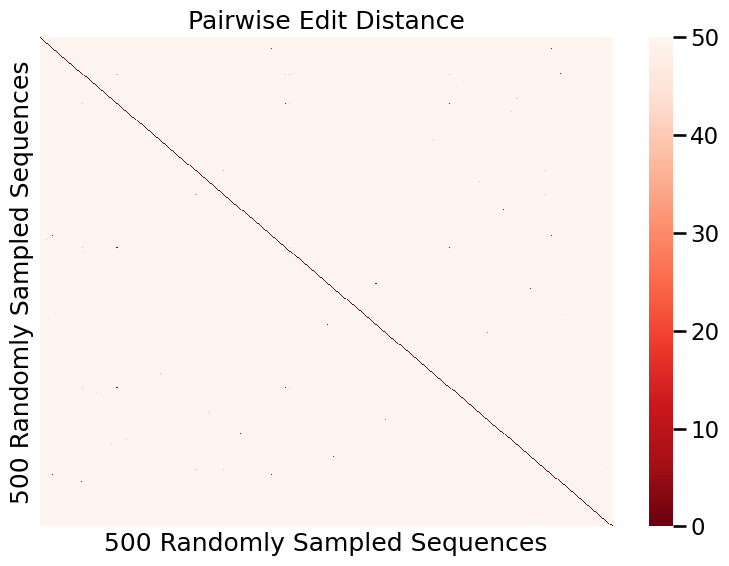

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Levenshtein
from joblib import Parallel, delayed

# Your list of sequences
sequences = seqs_with_codes_and_species["seq"].sample(500).tolist()
n = len(sequences)

# Step 1: Parallelized pairwise computation
def compute_dist(i, j):
    return Levenshtein.distance(sequences[i], sequences[j])

# Create a blank matrix
edit_distance_matrix = np.zeros((n, n))

# Compute upper triangle (i <= j)
results = Parallel(n_jobs=-1, verbose=1)(
    delayed(compute_dist)(i, j) for i in range(n) for j in range(i, n)
)

# Fill matrix with results
k = 0
for i in range(n):
    for j in range(i, n):
        dist = results[k]
        edit_distance_matrix[i, j] = dist
        edit_distance_matrix[j, i] = dist
        k += 1

# Step 2: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(edit_distance_matrix, annot=False, cmap="Reds_r", vmin=0, vmax=50)
plt.xticks([])
plt.yticks([])
plt.title("Pairwise Edit Distance")
plt.xlabel("500 Randomly Sampled Sequences")
plt.ylabel("500 Randomly Sampled Sequences")
plt.tight_layout()
plt.show()
